In [1]:
import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,RobustScaler
import random

from sklearn.metrics import recall_score
from scipy import stats
#from catboost import CatBoostClassifier, EShapCalcType, EFeaturesSelectionAlgorithm, Pool
from sklearn.metrics import recall_score, log_loss

import collections
import operator
from collections import OrderedDict
from datetime import datetime

from sklearn.utils import compute_class_weight
from sklearn.metrics import confusion_matrix

from catboost import CatBoostClassifier, EShapCalcType, EFeaturesSelectionAlgorithm, Pool

from sklearn.metrics import precision_score

In [2]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
data = pd.read_csv(r'D:\\Champ2022\\train_dataset_train.csv')
test = pd.read_csv(r'D:\\Champ2022\\test_dataset_test.csv')

In [7]:
for i in range(1,len(data.columns)):
    print(data.columns[i],data[data[data.columns[i]].notna()].shape[0])

age_indicator 159123
month_id 200000
student_id 200000
program_id 200000
carts_created_at 200000
spent_time_total 86309
spent_time_to_complete_hw 42467
completed_hw 97599
failed_hw 97599
reworked_hw 97599
interacted_hw 97599
avg_hw_mark 44496
test_with_good_mark 97599
test_with_great_mark 97599
webinars 97599
avg_quiz_result 16259
notes 97599
hw_leader 97599
lessons 97599
activity 97599
bought_d1 200000
bought_d2 200000
bought_d3 200000
bought_d4 200000
bought_d5 200000
bought_avg_duration 10359
payment_type 200000
promo 200000
price 200000
communication_type 198595
auto_payment 200000
ABC 200000
city 13592
country 12944
gender 199940
speed_recall 21880
os 77374
browser 77374
platform 77361
m_avg_talk_duration 51537
m_avg_duration 45764
m_missed_calls 51537
m_total_calls 51537
m_was_conversations 51537
m_total_duration 51537
p_avg_talk_duration 16453
p_avg_duration 13488
p_missed_calls 16453
p_total_calls 16453
p_was_conversations 16453
p_total_duration 16453
support_feedback_avg 37557

In [5]:
for i in range(1,len(test.columns)):
    print(test.columns[i],test[test[test.columns[i]].notna()].shape[0])

age_indicator 67548
month_id 84997
student_id 84997
program_id 84997
carts_created_at 84997
spent_time_total 36687
spent_time_to_complete_hw 18046
completed_hw 41481
failed_hw 41481
reworked_hw 41481
interacted_hw 41481
avg_hw_mark 18909
test_with_good_mark 41481
test_with_great_mark 41481
webinars 41481
avg_quiz_result 6954
notes 41481
hw_leader 41481
lessons 41481
activity 41481
bought_d1 84997
bought_d2 84997
bought_d3 84997
bought_d4 84997
bought_d5 84997
bought_avg_duration 4277
payment_type 84997
promo 84997
price 84997
communication_type 84361
auto_payment 84997
ABC 84997
city 5669
country 5423
gender 84978
speed_recall 9283
os 33026
browser 33026
platform 33018
m_avg_talk_duration 21908
m_avg_duration 19375
m_missed_calls 21908
m_total_calls 21908
m_was_conversations 21908
m_total_duration 21908
p_avg_talk_duration 7129
p_avg_duration 5867
p_missed_calls 7129
p_total_calls 7129
p_was_conversations 7129
p_total_duration 7129
support_feedback_avg 15749
feedback_avg_d1 20650
feedb

# FILLNA

In [4]:
data['age_indicator'] = data['age_indicator'].fillna(data.age_indicator.median())
test['age_indicator'] = test['age_indicator'].fillna(test.age_indicator.median())

test['gender'] = test['gender'].fillna(3) 
data['gender'] = data['gender'].fillna(3) 

data['communication_type'] = data['communication_type'].fillna('dont') 
test['communication_type'] = test['communication_type'].fillna('dont') 

data['os'] = data['os'].fillna('dont') 
test['os'] = test['os'].fillna('dont') 

In [5]:
data.shape, test.shape

((200000, 59), (84997, 58))

In [8]:
data.head(2)

,id,age_indicator,month_id,student_id,program_id,carts_created_at,spent_time_total,spent_time_to_complete_hw,completed_hw,failed_hw,...,p_total_calls,p_was_conversations,p_total_duration,support_feedback_avg,feedback_avg_d1,feedback_avg_d2,feedback_avg_d3,feedback_avg_d4,feedback_avg_d5,target
0,15182,32.0,9/30/2020,6694527,1469,8/26/2020,163.0,0.0,1.0,0.0,...,NaN,NaN,NaN,4.0,5.0,NaN,NaN,NaN,NaN,0
1,89385,20.0,6/30/2021,6712877,1392,8/5/2020,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [9]:
data.target.unique()

array([0, 3, 1, 4, 5, 2], dtype=int64)

<AxesSubplot:>

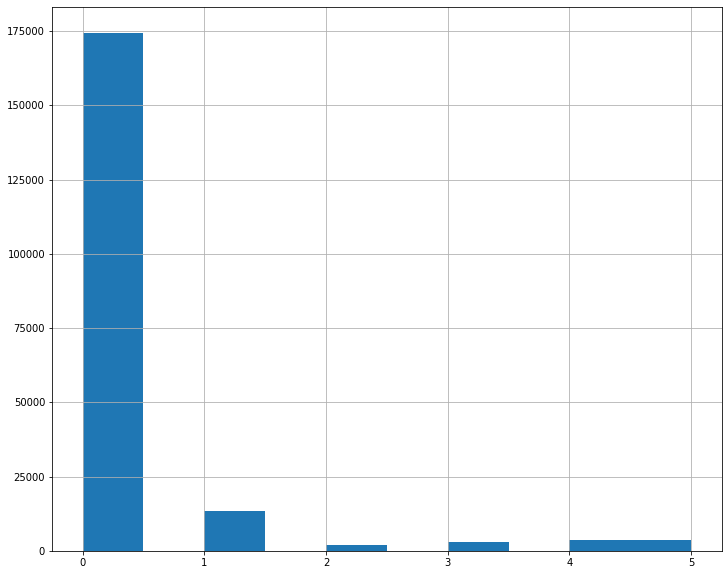

In [10]:
data.target.hist()

In [11]:
columns_test = []
for col in test.columns:
    if test[~test[col].isnull()].shape[0] == 84997:
        columns_test.append(col)

columns_test
columns_test_data = columns_test + ['target']

In [12]:
columns_test

['id',
 'age_indicator',
 'month_id',
 'student_id',
 'program_id',
 'carts_created_at',
 'bought_d1',
 'bought_d2',
 'bought_d3',
 'bought_d4',
 'bought_d5',
 'payment_type',
 'promo',
 'price',
 'communication_type',
 'auto_payment',
 'ABC',
 'gender',
 'os']

In [13]:
data = data[columns_test_data]
data.shape

(200000, 20)

In [14]:
test = test[columns_test]
test.shape

(84997, 19)

In [15]:
import datetime

data['month_id'] = data['month_id'].astype('datetime64[ns]')
data['year'] = data['month_id'].dt.year
data['month_id'] = data['month_id'].dt.month

test['month_id'] = test['month_id'].astype('datetime64[ns]')
test['year'] = test['month_id'].dt.year
test['month_id'] = test['month_id'].dt.month

data['carts_created_at'] = data['carts_created_at'].astype('datetime64[ns]')
data['year2'] = data['carts_created_at'].dt.year
data['carts_created_at'] = data['carts_created_at'].dt.month

test['carts_created_at'] = test['carts_created_at'].astype('datetime64[ns]')
test['year2'] = test['carts_created_at'].dt.year
test['carts_created_at'] = test['carts_created_at'].dt.month


In [16]:
def Delete_Col(dataset):
    dataset = dataset.drop(['id','student_id'],axis=1)
    return dataset

data = Delete_Col(data)
test = Delete_Col(test)

In [17]:
def Get_Dummies(dataset):
    dataset = pd.get_dummies(dataset)
    return dataset

data = Get_Dummies(data)
test = Get_Dummies(test)

columns_test = list(test.columns)
columns_data = list(data.columns)

columns = [i for i in columns_data if i in columns_test]
columns_data = columns + ['target']
data = data[columns_data]
test = test[columns]

data.shape,test.shape

((200000, 35), (84997, 34))

# Y_HAT

(array([174301.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  25699.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

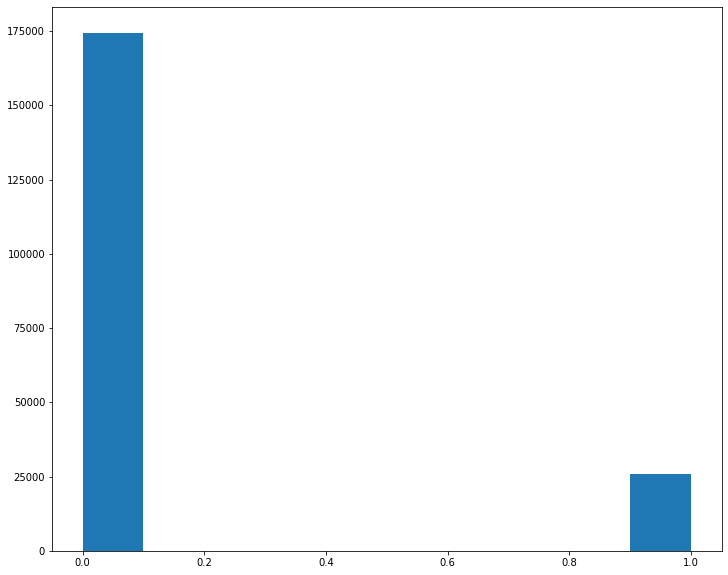

In [18]:
y_hat_0 = []
for i in range(data.shape[0]):
    if data.iloc[i,-1] == 0:
        y_hat_0.append(0)
    else:
        y_hat_0.append(1)

data['y_hat_0'] = y_hat_0
plt.hist(y_hat_0)

In [19]:
data.columns

Index(['age_indicator', 'month_id', 'program_id', 'carts_created_at',
       'bought_d1', 'bought_d2', 'bought_d3', 'bought_d4', 'bought_d5',
       'payment_type', 'price', 'auto_payment', 'gender', 'year', 'year2',
       'promo_+', 'promo_-', 'communication_type_dont',
       'communication_type_order', 'communication_type_phone',
       'communication_type_web', 'ABC_A', 'ABC_B', 'ABC_C', 'ABC_D',
       'os_Android', 'os_Chrome OS', 'os_Fedora', 'os_Linux', 'os_Mac OS X',
       'os_Ubuntu', 'os_Windows', 'os_dont', 'os_iOS', 'target', 'y_hat_0'],
      dtype='object')

# Y_HAT 1

C:\Users\olgaa\AppData\Local\Temp\ipykernel_15904\417911368.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data_1['y_hat_1'] = y_hat_1


(array([13512.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 12187.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

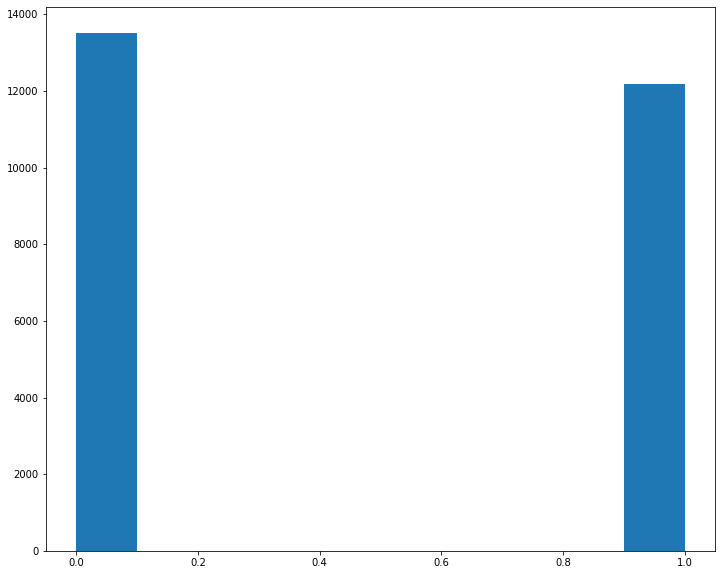

In [20]:
sub_data_1 = data.query('target != 0')

y_hat_1 = []
for i in range(sub_data_1.shape[0]):
    if sub_data_1.iloc[i,-2] == 1:
        y_hat_1.append(0)
    else:
        y_hat_1.append(1)

sub_data_1['y_hat_1'] = y_hat_1
plt.hist(y_hat_1)

<AxesSubplot:>

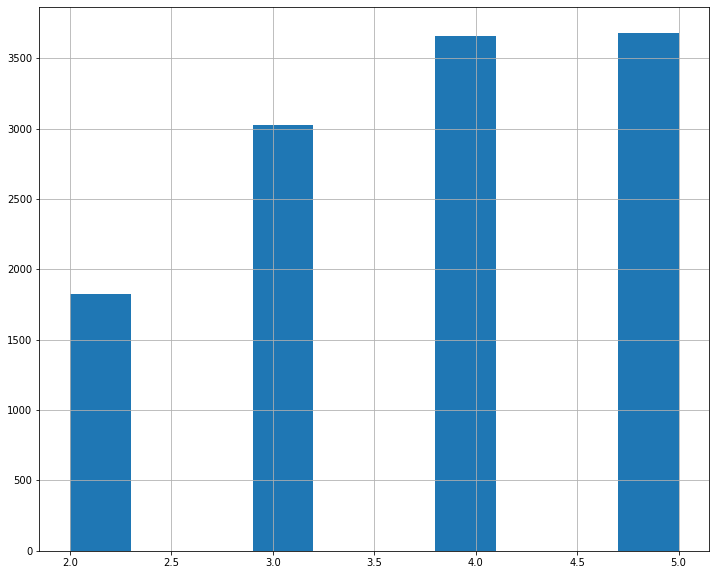

In [21]:
sub_data_2 = sub_data_1.query('target != 1')
sub_data_2 = sub_data_2.drop(['y_hat_0'],axis=1)
sub_data_2.target.hist()

In [22]:
y = data[['y_hat_0']]
y_sub_2 = sub_data_2[['target']]
y_sub_1 = sub_data_1[['y_hat_1']]

original_test = test.copy()
raw_df = data.copy()

In [23]:
sub_data_2 = sub_data_2.drop(['target','y_hat_1'],axis=1).copy()
sub_data_1 = sub_data_1.drop(['target'],axis=1).copy()

In [24]:
columns_test = list(original_test.columns)
columns_data = list(data.columns)

columns = [i for i in columns_data if i in columns_test]

In [25]:
sub_data_2 = sub_data_2[columns]
sub_data_1 = sub_data_1[columns]
raw_df = raw_df[columns]

sub_data_1.shape,sub_data_2.shape,raw_df.shape

((25699, 34), (12187, 34), (200000, 34))

In [26]:
sub_data_2.columns

Index(['age_indicator', 'month_id', 'program_id', 'carts_created_at',
       'bought_d1', 'bought_d2', 'bought_d3', 'bought_d4', 'bought_d5',
       'payment_type', 'price', 'auto_payment', 'gender', 'year', 'year2',
       'promo_+', 'promo_-', 'communication_type_dont',
       'communication_type_order', 'communication_type_phone',
       'communication_type_web', 'ABC_A', 'ABC_B', 'ABC_C', 'ABC_D',
       'os_Android', 'os_Chrome OS', 'os_Fedora', 'os_Linux', 'os_Mac OS X',
       'os_Ubuntu', 'os_Windows', 'os_dont', 'os_iOS'],
      dtype='object')

# CATBOOST

In [27]:
from catboost.utils import get_roc_curve
import sklearn
from sklearn import metrics
from catboost.utils import select_threshold

# NN

In [28]:
NN = 15
categorical = ['program_id']

# 0

In [29]:
k1_list = []
k2_list = []
k3_list = []
in_bag = []
models = []
fpr_lst = []

for i in range(NN):
    print(i)
    k1 = random.randint(0,100000)
    k1_list.append(k1)
    train, val, y_train, y_val = train_test_split(np.array(raw_df),
                                  np.array(y),
                                  test_size=0.05,
                                  random_state=k1)
    
    k2 = random.randint(0,100000)
    k2_list.append(k2)
    train, test_df, y_train, y_test_df = train_test_split(train,
                                  y_train,
                                  test_size=0.05,
                                  random_state=k2)
        


    train_dataset = Pool(train,
                         y_train)
    
    eval_dataset = Pool(test_df,
                        y_test_df)
    
    val_pool = Pool(test_df,
                        y_test_df)

    k3 = random.randint(0,100000)
    k3_list.append(k3)
    model = CatBoostClassifier(custom_metric = ['TotalF1','Precision','Recall'],
                               #eval_metric=CountErrors(),
                               iterations = 10000,
                               learning_rate = 0.5,
                               random_seed=k3,
                               loss_function='CrossEntropy',
                               #l2_leaf_reg=1e-1,
                               #class_weights=class_weight,
                               verbose=1000)

    model.fit(train,
              y_train,
              eval_set=eval_dataset,
              early_stopping_rounds=1000)    
    models.append(model)


    print('BEFORE:',0.2*recall_score(y_val,model.predict(val),average='weighted')+0.8*precision_score(y_val,model.predict(val),average='weighted'))
    
    

    
print(k1_list,k2_list,k3_list)

0
0:	learn: 0.3999141	test: 0.4042944	best: 0.4042944 (0)	total: 228ms	remaining: 37m 58s
1000:	learn: 0.1356828	test: 0.1900875	best: 0.1900836 (999)	total: 1m 34s	remaining: 14m 6s
2000:	learn: 0.0820173	test: 0.1474934	best: 0.1474934 (2000)	total: 3m 10s	remaining: 12m 41s
3000:	learn: 0.0539450	test: 0.1236955	best: 0.1236955 (3000)	total: 4m 47s	remaining: 11m 10s
4000:	learn: 0.0379404	test: 0.1118246	best: 0.1117304 (3994)	total: 6m 17s	remaining: 9m 25s
5000:	learn: 0.0276889	test: 0.1048244	best: 0.1047121 (4976)	total: 7m 47s	remaining: 7m 46s
6000:	learn: 0.0210739	test: 0.1015766	best: 0.1015545 (5999)	total: 9m 15s	remaining: 6m 10s
7000:	learn: 0.0164133	test: 0.1008305	best: 0.1008133 (6973)	total: 10m 41s	remaining: 4m 34s
8000:	learn: 0.0134925	test: 0.0996630	best: 0.0994739 (7874)	total: 12m 6s	remaining: 3m 1s
Stopped by overfitting detector  (1000 iterations wait)

bestTest = 0.09947392377
bestIteration = 7874

Shrink model to first 7875 iterations.
BEFORE: 0.9745

Stopped by overfitting detector  (1000 iterations wait)

bestTest = 0.1032662801
bestIteration = 7205

Shrink model to first 7206 iterations.
BEFORE: 0.9708529520466805
8
0:	learn: 0.3940677	test: 0.3944583	best: 0.3944583 (0)	total: 74.9ms	remaining: 12m 28s
1000:	learn: 0.1337347	test: 0.1753643	best: 0.1753616 (999)	total: 1m 14s	remaining: 11m 6s
2000:	learn: 0.0814024	test: 0.1363929	best: 0.1363692 (1997)	total: 2m 14s	remaining: 8m 57s
3000:	learn: 0.0538421	test: 0.1137992	best: 0.1137992 (3000)	total: 3m 11s	remaining: 7m 26s
4000:	learn: 0.0379148	test: 0.1018145	best: 0.1017200 (3986)	total: 4m 8s	remaining: 6m 12s
5000:	learn: 0.0274480	test: 0.0943530	best: 0.0942773 (4992)	total: 5m 6s	remaining: 5m 5s
6000:	learn: 0.0207618	test: 0.0911522	best: 0.0910719 (5962)	total: 6m 9s	remaining: 4m 6s
7000:	learn: 0.0165840	test: 0.0886948	best: 0.0886662 (6995)	total: 7m 12s	remaining: 3m 5s
8000:	learn: 0.0137660	test: 0.0886289	best: 0.0884339 (7133)	total: 8m 14s	remaining: 2m

In [30]:
y_pred_0 = []

for i in range(len(models)):
    y_pred_0.append(models[i].predict_proba(original_test))
    
y_pred_0 = np.median(y_pred_0,axis=0)

In [43]:
for i in range(len(models)):
    models[i].save_model(r'D:\\Champ2022\\Models\\Best\\0\\model_'+str(i))

# 1

In [32]:
k1_list = []
k2_list = []
k3_list = []
in_bag = []
models_1 = []
fpr_lst = []

for i in range(NN):
    print(i)
    k1 = random.randint(0,100000)
    k1_list.append(k1)
    train, val, y_train, y_val = train_test_split(np.array(sub_data_1),
                                  np.array(y_sub_1),
                                  test_size=0.05,
                                  random_state=k1)
    
    k2 = random.randint(0,100000)
    k2_list.append(k2)
    train, test_df, y_train, y_test_df = train_test_split(train,
                                  y_train,
                                  test_size=0.05,
                                  random_state=k2)
        


    train_dataset = Pool(train,
                         y_train)
    
    eval_dataset = Pool(test_df,
                        y_test_df)
    
    val_pool = Pool(test_df,
                        y_test_df)

    k3 = random.randint(0,100000)
    k3_list.append(k3)
    model = CatBoostClassifier(custom_metric = ['TotalF1','Precision','Recall'],
                               #eval_metric=CountErrors(),
                               iterations = 10000,
                               learning_rate = 0.5,
                               random_seed=k3,
                               loss_function='CrossEntropy',
                               #l2_leaf_reg=1e-1,
                               #class_weights=class_weight,
                               verbose=1000)

    model.fit(train,
              y_train,
              eval_set=eval_dataset,
              early_stopping_rounds=1000)    
    models_1.append(model)


    print('BEFORE:',0.2*recall_score(y_val,model.predict(val),average='weighted')+0.8*precision_score(y_val,model.predict(val),average='weighted'))
    
print(k1_list,k2_list,k3_list)

0
0:	learn: 0.6559125	test: 0.6565946	best: 0.6565946 (0)	total: 28.5ms	remaining: 4m 45s
1000:	learn: 0.0335634	test: 0.1097469	best: 0.1097397 (999)	total: 23s	remaining: 3m 26s
2000:	learn: 0.0146973	test: 0.0949174	best: 0.0949162 (1987)	total: 46.4s	remaining: 3m 5s
3000:	learn: 0.0127554	test: 0.0927657	best: 0.0924329 (2984)	total: 1m 5s	remaining: 2m 31s
4000:	learn: 0.0121046	test: 0.0926235	best: 0.0922057 (3611)	total: 1m 24s	remaining: 2m 6s
Stopped by overfitting detector  (1000 iterations wait)

bestTest = 0.09220571636
bestIteration = 3611

Shrink model to first 3612 iterations.
BEFORE: 0.971990954010668
1
0:	learn: 0.6499473	test: 0.6593596	best: 0.6593596 (0)	total: 27.8ms	remaining: 4m 37s
1000:	learn: 0.0342191	test: 0.1218416	best: 0.1214954 (998)	total: 24.8s	remaining: 3m 42s
2000:	learn: 0.0150225	test: 0.1096649	best: 0.1083644 (1798)	total: 46.7s	remaining: 3m 6s
Stopped by overfitting detector  (1000 iterations wait)

bestTest = 0.1083644433
bestIteration = 17

In [33]:
y_pred_1 = []
border_lst = []

for i in range(len(models_1)):
    y_pred_1.append(models_1[i].predict_proba(original_test))
    #border_lst.append(select_threshold(model=models[i], data=val_pool, FPR=0.01))
    
y_pred_1 = np.median(y_pred_1,axis=0)


In [44]:
for i in range(len(models_1)):
    models_1[i].save_model(r'D:\\Champ2022\\Models\\Best\\1\\model_'+str(i))

# 2

In [35]:
k1_list = []
k2_list = []
k3_list = []
in_bag = []
models2 = []

for i in range(NN):
    print(i)
    k1 = random.randint(0,100000)
    k1_list.append(k1)
    train, val, y_train, y_val = train_test_split(np.array(sub_data_2),
                                  np.array(y_sub_2),
                                  test_size=0.05,
                                  random_state=k1)
    
    k2 = random.randint(0,100000)
    k2_list.append(k2)
    train, test_df, y_train, y_test_df = train_test_split(train,
                                  y_train,
                                  test_size=0.05,
                                  random_state=k2)
        

    #in_bag.append(train.index)



    train_dataset = Pool(train,
                         y_train)
    
    eval_dataset = Pool(test_df,
                        y_test_df)
    
    k3 = random.randint(0,100000)
    k3_list.append(k3)
    model2 = CatBoostClassifier(custom_metric = ['TotalF1','Precision','Recall'],
                               #eval_metric=CountErrors(),
                               iterations = 50000,
                               learning_rate = 0.1,
                                random_seed=k3,
                                loss_function='MultiClassOneVsAll',
                               #class_weights=class_weight,
                               verbose=1000)

    model2.fit(train,
              y_train,
              eval_set=eval_dataset,
              early_stopping_rounds=1000)    
    models2.append(model2)

    print(0.2*recall_score(y_val,model2.predict(val),average='weighted')+0.8*precision_score(y_val,model2.predict(val),average='weighted'))
    print('\n')
    


0
0:	learn: 0.6587042	test: 0.6581380	best: 0.6581380 (0)	total: 16.8ms	remaining: 14m 2s
1000:	learn: 0.1292392	test: 0.1640539	best: 0.1640539 (1000)	total: 16.9s	remaining: 13m 46s
2000:	learn: 0.0730745	test: 0.1094179	best: 0.1094179 (2000)	total: 34.4s	remaining: 13m 44s
3000:	learn: 0.0483417	test: 0.0852746	best: 0.0852746 (3000)	total: 52.3s	remaining: 13m 39s
4000:	learn: 0.0347313	test: 0.0720593	best: 0.0720593 (4000)	total: 1m 10s	remaining: 13m 34s
5000:	learn: 0.0268062	test: 0.0649720	best: 0.0649720 (5000)	total: 1m 28s	remaining: 13m 13s
6000:	learn: 0.0215042	test: 0.0599718	best: 0.0599718 (6000)	total: 1m 46s	remaining: 13m 2s
7000:	learn: 0.0178841	test: 0.0569050	best: 0.0568827 (6994)	total: 2m 3s	remaining: 12m 38s
8000:	learn: 0.0151530	test: 0.0545468	best: 0.0545402 (7997)	total: 2m 23s	remaining: 12m 32s
9000:	learn: 0.0131351	test: 0.0529203	best: 0.0529203 (9000)	total: 2m 49s	remaining: 12m 52s
10000:	learn: 0.0116163	test: 0.0517164	best: 0.0517164 (100

16000:	learn: 0.0069913	test: 0.0622280	best: 0.0621796 (15929)	total: 4m 7s	remaining: 8m 46s
Stopped by overfitting detector  (1000 iterations wait)

bestTest = 0.06217957179
bestIteration = 15929

Shrink model to first 15930 iterations.
0.9656045112478888


4
0:	learn: 0.6594786	test: 0.6597750	best: 0.6597750 (0)	total: 15.6ms	remaining: 12m 58s
1000:	learn: 0.1283534	test: 0.1599292	best: 0.1599292 (1000)	total: 15.9s	remaining: 12m 56s
2000:	learn: 0.0733215	test: 0.1131501	best: 0.1131501 (2000)	total: 31.3s	remaining: 12m 31s
3000:	learn: 0.0490573	test: 0.0925637	best: 0.0925637 (3000)	total: 46.6s	remaining: 12m 9s
4000:	learn: 0.0357215	test: 0.0817825	best: 0.0817462 (3997)	total: 1m 2s	remaining: 11m 52s
5000:	learn: 0.0273864	test: 0.0755779	best: 0.0755605 (4982)	total: 1m 17s	remaining: 11m 38s
6000:	learn: 0.0217951	test: 0.0712227	best: 0.0712227 (6000)	total: 1m 33s	remaining: 11m 22s
7000:	learn: 0.0180316	test: 0.0695913	best: 0.0695829 (6944)	total: 1m 48s	remaini

1000:	learn: 0.1284477	test: 0.1623986	best: 0.1623986 (1000)	total: 18.5s	remaining: 15m 3s
2000:	learn: 0.0736246	test: 0.1168252	best: 0.1168252 (2000)	total: 36.7s	remaining: 14m 40s
3000:	learn: 0.0487356	test: 0.0969177	best: 0.0969177 (3000)	total: 57.2s	remaining: 14m 56s
4000:	learn: 0.0352537	test: 0.0857681	best: 0.0857424 (3991)	total: 1m 18s	remaining: 15m
5000:	learn: 0.0268551	test: 0.0796695	best: 0.0796695 (5000)	total: 1m 40s	remaining: 15m 7s
6000:	learn: 0.0214796	test: 0.0760047	best: 0.0760047 (6000)	total: 1m 59s	remaining: 14m 33s
7000:	learn: 0.0177337	test: 0.0730107	best: 0.0730022 (6999)	total: 2m 16s	remaining: 13m 58s
8000:	learn: 0.0149956	test: 0.0716625	best: 0.0715891 (7887)	total: 2m 32s	remaining: 13m 22s
9000:	learn: 0.0130415	test: 0.0701734	best: 0.0700922 (8973)	total: 2m 49s	remaining: 12m 50s
10000:	learn: 0.0114830	test: 0.0698163	best: 0.0697663 (9763)	total: 3m 5s	remaining: 12m 21s
11000:	learn: 0.0103067	test: 0.0692977	best: 0.0692042 (10

18000:	learn: 0.0063078	test: 0.0510877	best: 0.0510613 (17832)	total: 4m 44s	remaining: 8m 24s
19000:	learn: 0.0060104	test: 0.0510548	best: 0.0510293 (18639)	total: 4m 59s	remaining: 8m 8s
20000:	learn: 0.0057411	test: 0.0508496	best: 0.0508452 (19998)	total: 5m 15s	remaining: 7m 52s
21000:	learn: 0.0054876	test: 0.0507291	best: 0.0506922 (20718)	total: 5m 31s	remaining: 7m 37s
22000:	learn: 0.0052760	test: 0.0508194	best: 0.0506889 (21110)	total: 5m 46s	remaining: 7m 20s
Stopped by overfitting detector  (1000 iterations wait)

bestTest = 0.0506888666
bestIteration = 21110

Shrink model to first 21111 iterations.
0.9658942353099498


14
0:	learn: 0.6544623	test: 0.6538671	best: 0.6538671 (0)	total: 16.4ms	remaining: 13m 40s
1000:	learn: 0.1303509	test: 0.1674678	best: 0.1674678 (1000)	total: 16.8s	remaining: 13m 42s
2000:	learn: 0.0734339	test: 0.1161209	best: 0.1161161 (1999)	total: 32.5s	remaining: 13m
3000:	learn: 0.0485613	test: 0.0928523	best: 0.0928523 (3000)	total: 48.4s	remai

In [36]:
print(k1_list,k2_list,k3_list)

[30589, 23467, 339, 79485, 6718, 43114, 31640, 12123, 19218, 62418, 87163, 52726, 21744, 7052, 26284] [52681, 45077, 26480, 20087, 82882, 72357, 65592, 554, 56748, 37986, 567, 62464, 42406, 90931, 11521] [74368, 72598, 908, 93128, 46752, 13083, 7104, 46357, 77765, 14167, 65224, 38489, 50140, 57681, 77083]


(array([18615.,     0.,     0., 17785.,     0.,     0., 23729.,     0.,
            0., 24868.]),
 array([2. , 2.3, 2.6, 2.9, 3.2, 3.5, 3.8, 4.1, 4.4, 4.7, 5. ]),
 <BarContainer object of 10 artists>)

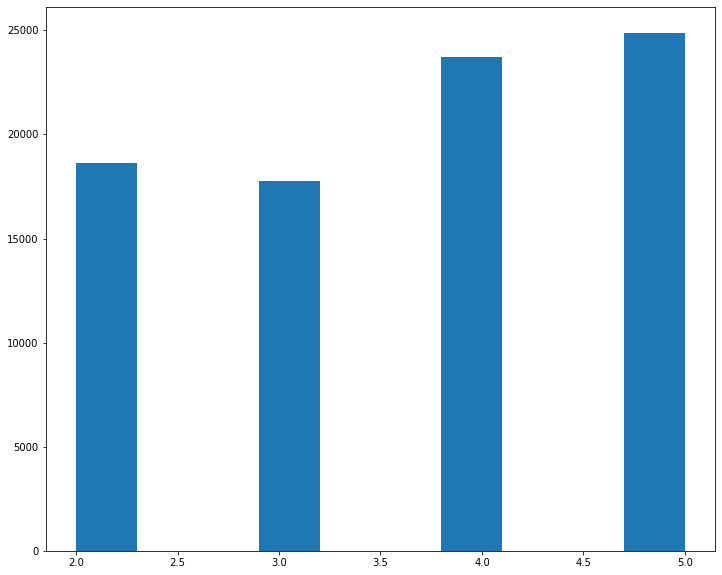

In [37]:
y_pred_2 = []
for i in range(len(models2)):
    y_pred_2.append(models2[i].predict_proba(original_test))

y_pred_2 = np.median(y_pred_2,axis=0)
y_pred_c = np.argmax(np.squeeze(y_pred_2),axis=1)+2
plt.hist(y_pred_c)

In [46]:
for i in range(len(models2)):
    models2[i].save_model(r'D:\\Champ2022\\Models\\Best\\2\\model_'+str(i))

# CONCAT

In [39]:
p_0 = []
p_1 = []
p_2 = []
p_3 = []
p_4 = []
p_5 = []

for i in range(original_test.shape[0]):
    p_0.append(y_pred_0[i,0])
    p_1.append(y_pred_0[i,1]*y_pred_1[i,0])
    p_2.append(y_pred_0[i,1]*y_pred_1[i,1]*y_pred_2[i,0])
    p_3.append(y_pred_0[i,1]*y_pred_1[i,1]*y_pred_2[i,1])
    p_4.append(y_pred_0[i,1]*y_pred_1[i,1]*y_pred_2[i,2])
    p_5.append(y_pred_0[i,1]*y_pred_1[i,1]*y_pred_2[i,3])

(array([75107.,     0.,  5244.,     0.,   642.,     0.,  1249.,     0.,
         1394.,  1361.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

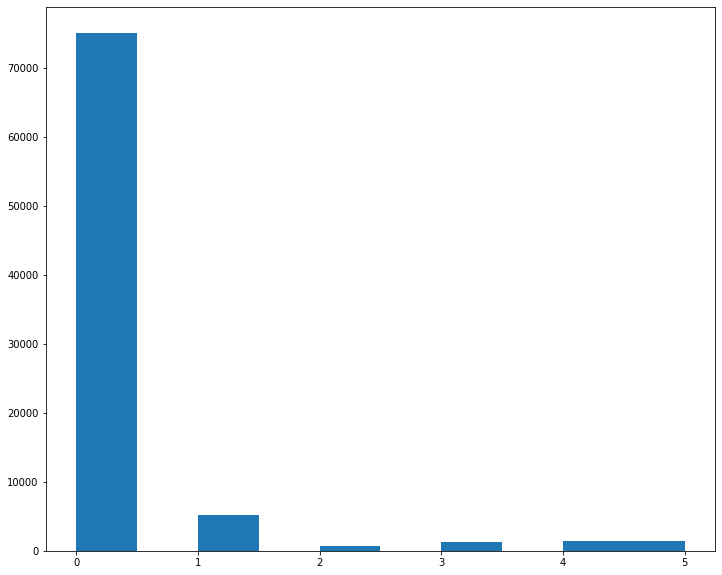

In [40]:
y_predicted = pd.DataFrame({'0':p_0,
                           '1':p_1,
                           '2':p_2,
                           '3':p_3,
                           '4':p_4,
                           '5':p_5})

y_predicted = np.array(y_predicted)
y_predicted = np.argmax(y_predicted,axis=1)
plt.hist(y_predicted)

In [41]:
solution = pd.read_csv(r'D:\\Champ2022\\sample_solution.csv')
solution.iloc[:,1] = y_predicted

solution.to_csv(r'D:\\Champ2022\\solution.csv', index=False)